# Saravanakumar G (EBSLEM0322454664)

# Project: Predicting Heart Disease 

## ABSTRACT
        Heart plays significant role in living organisms. Diagnosis and prediction of heart related diseases requires more precision, perfection and correctness because a little mistake can cause fatigue problem or death of the person, there are numerous death cases related to heart and their counting is increasing exponentially day by day. To deal with the problem there is essential need of prediction system for awareness about diseases. Machine learning is the branch of Artificial Intelligence(AI), it provides prestigious support in predicting any kind of event which take training from natural events. In this paper, we calculate accuracy of machine learning algorithms for predicting heart disease, for this algorithms are  k-nearest neighbor, decision tree,Logistic Regression, support vectomachine(SVM),Naives Bayes Classifier, Random Forest and XGBoost by using Kaggle  repository dataset. For implementation of Python programming Anaconda(jupyter) notebook is best tool, which have many type of library, header file, that make the work more accurate and precise.


## Features & Predictor:
Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1.age (#)

2.sex : 1= Male, 0= Female (Binary)

3.(cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value
 4: asymptomatic (

4.(trestbps) resting blood pressure (#)

5.(chol) serum cholestoral in mg/dl (#)

6.(fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)

7.(restecg) resting electrocardiographic results(values 0,1,2)

8.(thalach) maximum heart rate achieved (#)

9.(exang) exercise induced angina (binary) (1 = yes; 0 = no)

10.(oldpeak) = ST depression induced by exercise relative to rest (#)

11.(slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping )

12.(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy

13.(thal) maximum heart rate achieved - (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversable defect

## librarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## Data Wrangling

In [4]:
data=pd.read_csv("heart_disease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.nunique(axis=0) #returns the number of unique value for each variable

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe() #summarize the count

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print(data.isna().sum()) # Display the Missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Let's see if theirs a good proportion between our positive and negative results. It appears we have a good balance between the two.

In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Explorary Data Analysis

## Correlations

Correlation Matrix- let's you see correlations between all variables. Within seconds, you can see whether something is positivly or negativly correlated with our predictor (target)

<AxesSubplot:>

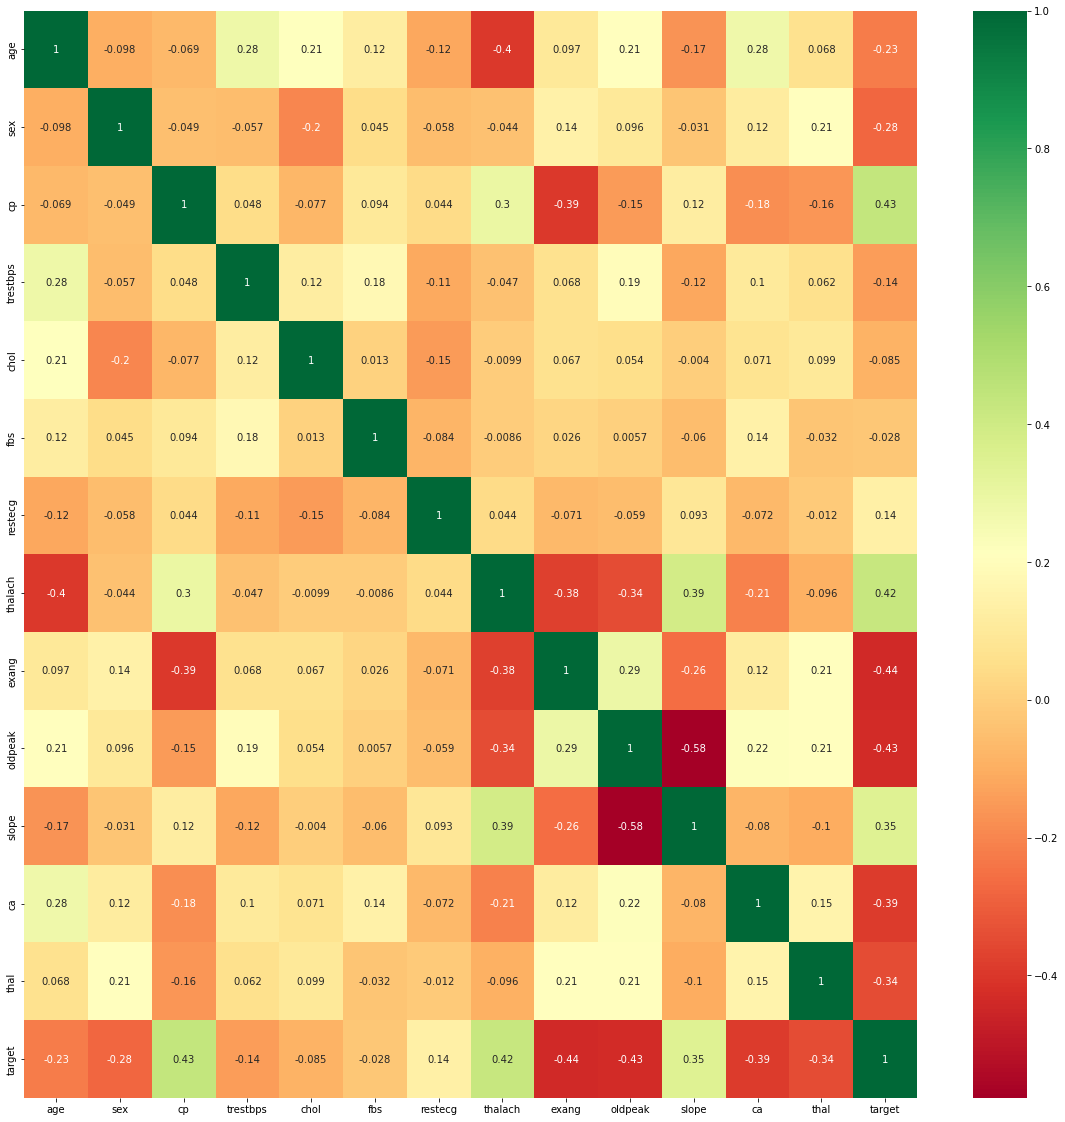

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, The greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.

In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

Pairplots are also a great way to immediatly see the correlations between all variables. But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continous features.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

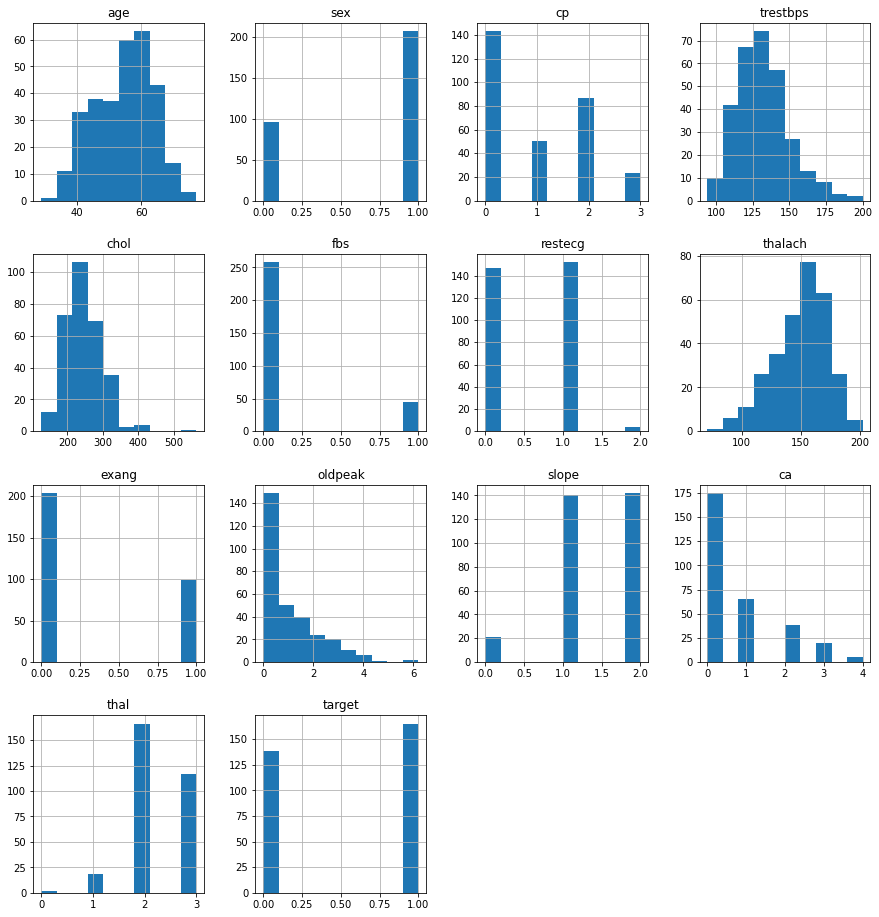

In [14]:
data.hist(figsize=(15,16))

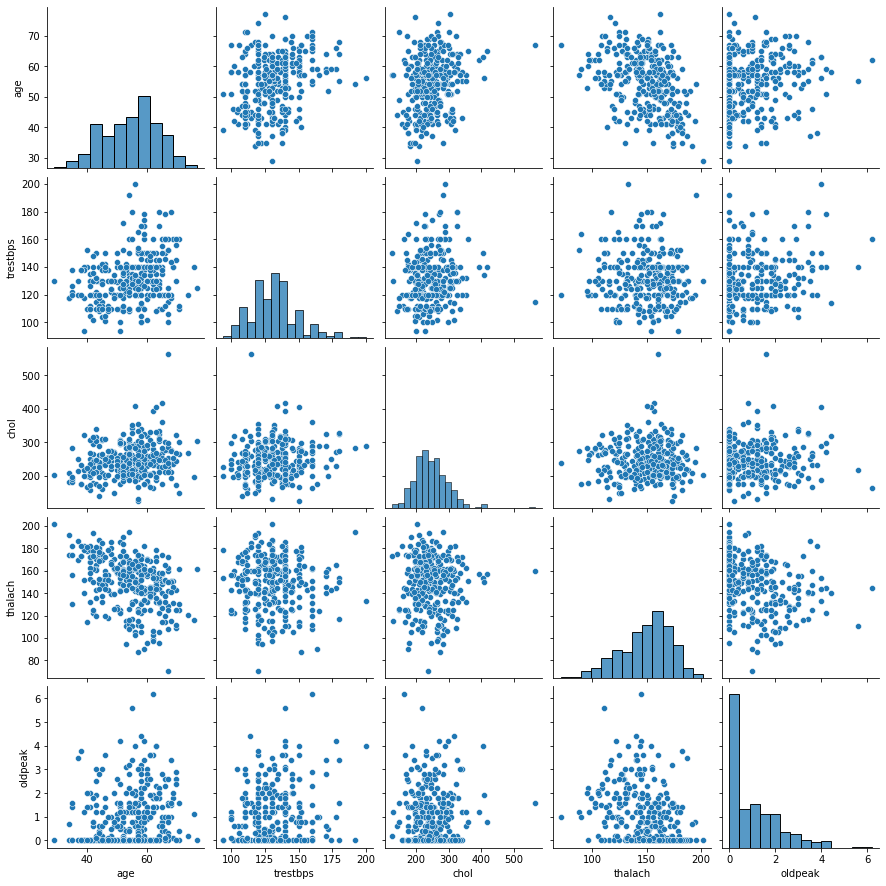

In [12]:
subData=data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

#### Chose to make a smaller pairplot with only the continus variables, to dive deeper into the relationships. Also a great way to see if theirs a positve or negative correlation!

Text(26.426458333333343, 0.5, 'ST depression')

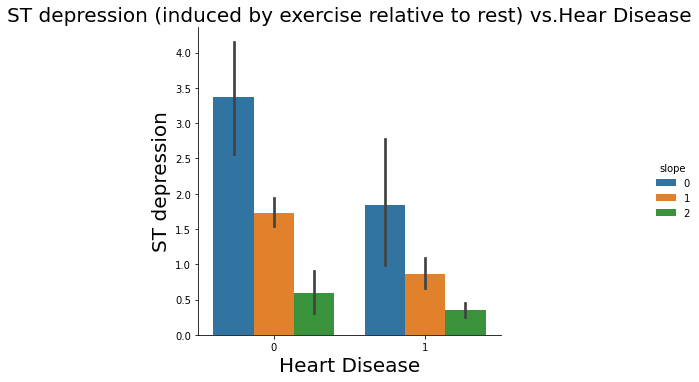

In [15]:
sns.catplot(x="target",y="oldpeak",hue="slope",kind="bar",data=data);
plt.title("ST depression (induced by exercise relative to rest) vs.Hear Disease",size=20)
plt.xlabel("Heart Disease",size=20)
plt.ylabel("ST depression",size=20)


If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy.

## Violin & Box plots

The advantages of showing the Box & Violin plots is that it showsthe basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories. 

Text(0, 0.5, 'Thalach Level')

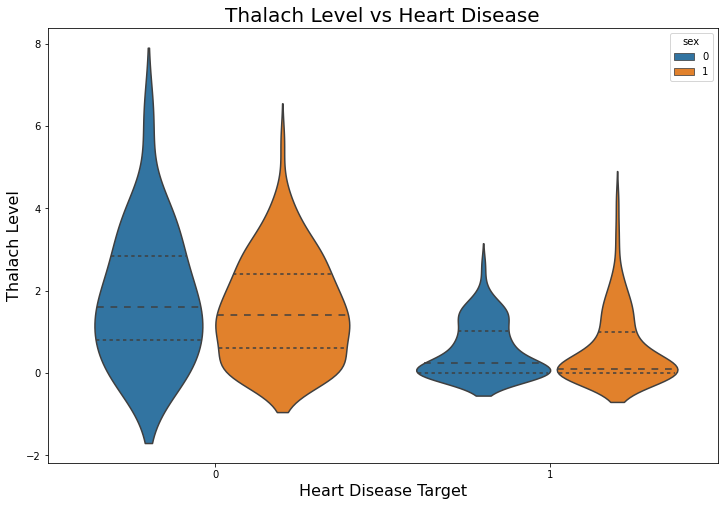

In [16]:
plt.figure(figsize=(12,8))
sns.violinplot(x="target",y="oldpeak",hue="sex",inner="quartile",data=data)
plt.title("Thalach Level vs Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",size=16)
plt.ylabel("Thalach Level",size=16)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.

Text(0, 0.5, 'Thalach Level')

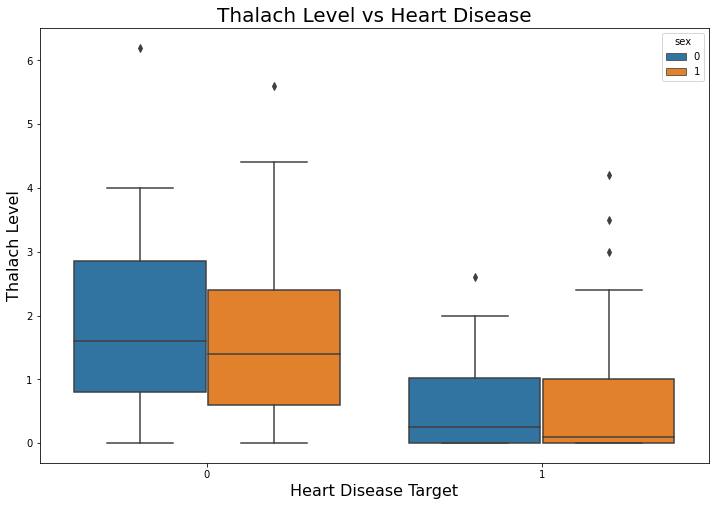

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x="target",y="oldpeak",hue="sex",data=data)
plt.title("Thalach Level vs Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",size=16)
plt.ylabel("Thalach Level",size=16)

## Filtering data by positive & negative Heart Disease patient

In [19]:
#positive
pos_data=data[data["target"]==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [20]:
#negative
neg_data=data[data["target"]==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


#### Positive&Negative Patients ST depression

In [21]:
print("(Positive Patients ST depression):"+str(pos_data["oldpeak"].mean()))
print("(Negative Patients ST depression):"+str(neg_data["oldpeak"].mean()))

(Positive Patients ST depression):0.5830303030303029
(Negative Patients ST depression):1.5855072463768118


#### Positive&Negative Patients thalach

In [22]:
print("Positive Patients thalach):"+str(pos_data["thalach"].mean()))
print("Negative Patients thalach):"+str(neg_data["thalach"].mean()))

Positive Patients thalach):158.46666666666667
Negative Patients thalach):139.1014492753623


From comparing positive and negative patients we can see there are vast differenes in means for many of our Features. From examing the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).

## Machine learning and Predictive Analytics

## Prepare the data

In [23]:
X=data.iloc[:,:-1].values

In [24]:
y=data.iloc[:,-1].values

In [25]:
X.shape

(303, 13)

In [26]:
y.shape

(303,)

### Split the dataset into the training and testing data

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
X_train.shape

(242, 13)

In [29]:
y_train.shape

(242,)

In [30]:
X_test.shape

(61, 13)

In [28]:
y_test.shape

(61,)

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling /Training
 We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of 
 
 Logistic Regression, 
 
 K-NN, 
 
 SVM, 
 
 Naives Bayes Classifier, 
 
 Decision Trees, 
 
 Random Forest. 
 
 XGBoost
 
 Note: these are all supervised learning models.

## Model 1:Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(X_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Model2: K-NN (K-Nearest Neighbors)

In [33]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(X_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Model 3: SVM (Support Vector Machine)

In [34]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(X_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Model 4: Naives Bayes Classifier

In [35]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(X_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Model 5: Decision Trees

In [37]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(X_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## Model 6: Random Forest

In [36]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(X_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



## Model 7: XGBoost

In [43]:
!pip install xgboost

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



From comparing the 7 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%.

## Measuring Model Performance
While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), let's keep this simple and use accuracy as our metric.  To do this are going to see how the model performs on new data (test set)

Accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points

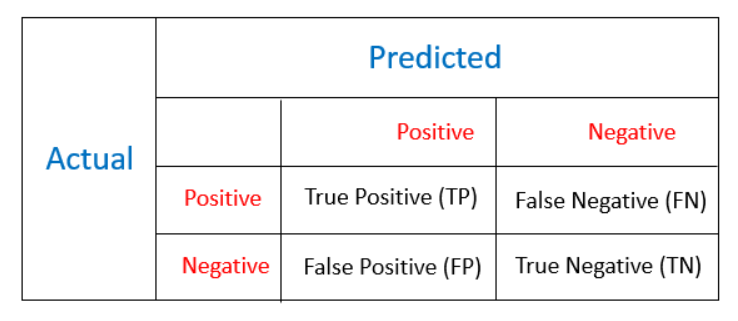

## Making the Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

21 is the amount of True Positivesdata, while 28 is True Negatives.

9 & 3 are the number of errors.

There are 9 type 1 error (False Positives)- You predicted positive and it’s false.

There are 3 type 2 error (False Negatives)- You predicted negative and it’s false.

Hence if we calculate the accuracy its # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN). (21+28)/(21+28+9+3) = 0.80 = 80% accuracy

Note: Aboue 70% is considered good but,be careful because if your data is extremly high , it may be (overfitting ).Thus,80% is the ideal accuray!

## Feature Importance 

In [46]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<AxesSubplot:>

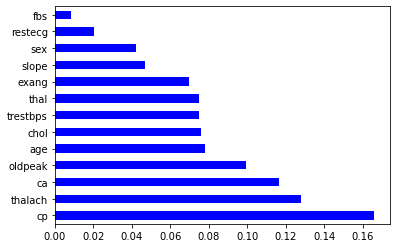

In [47]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')
#plt.xticks(rotation=45)

top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

## Predictions

Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Disease?

In [48]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


yes.Our machine learning algorithm has classified this patient with Heart Disease

Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. We can see that our results are very accurate!

In [49]:
y_pred = model6.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


## Building a Predictive System

In [36]:
input_data = (37,1,2,130,250,0,1,187,0,3.0,0,2,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


## Conclusions

 - Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

 - Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

 - Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.